In [1]:
!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.


     |████████████████████████████████| 266kB 34.1MB/s 
     |████████████████████████████████| 327kB 54.6MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.1-cp37-cp37m-linux_x86_64.whl size=85260 sha256=c162bd2ca8872da7eda76bb9c620cc1989fad54e07229e4618ea78584fb314f9
  Stored in directory: /root/.cache/pip/wheels/e4/ab/f7/cb39270df8f6126f3dd4c33d302357167086db460968cfc80c
Successfully built pyahocorasick
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive/')
project_path = '/content/drive/My Drive/Colab Notebooks/8_NLP/'
#Set project path for labels
data_file = project_path + 'Tweets.csv'

Mounted at /content/drive/


In [3]:
import pandas as pd
data = pd.read_csv(data_file)

In [4]:
data.shape  

(14640, 15)

In [5]:
data.head()   

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
data.isnull().sum(axis=0)  

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

Understand of data-columns: (5 Marks) On Analysis of the twitter feed data frame, the only relevant columns for our analysis is only two. The twitter text column which has the commets and airline sentiment which has the sentiment as positive, neutral or negative

In [7]:
data = data[['text','airline_sentiment']]

In [8]:
data.shape

(14640, 2)

In [9]:
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


Text pre-processing: Data preparation. (20 Marks) a. Html tag removal. b. Tokenization. c. Remove the numbers. d. Removal of Special Characters and Punctuations. e. Conversion to lowercase. f. Lemmatize or stemming. g. Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.) h. Print first 5 rows of data after pre-processing.

Html tag removal.

In [10]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


Replace contractions in string of text"

In [11]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

# Perform the above operation over all the rows of text column of the dataframe.
for i, row in data.iterrows():
    text = data.at[i, 'text']
    clean_text = replace_contractions(text)
    data.at[i,'text'] = clean_text
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials...,positive
2,@VirginAmerica I did not today... Must mean I ...,neutral
3,@VirginAmerica it is really aggressive to blas...,negative
4,@VirginAmerica and it is a really big bad thin...,negative


In [12]:
# Tokenize the words of whole dataframe.
for i, row in data.iterrows():
    text = data.at[i, 'text']
    words = nltk.word_tokenize(text)
    data.at[i,'text'] = words
data.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, com...",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Mu...",neutral
3,"[@, VirginAmerica, it, is, really, aggressive,...",negative
4,"[@, VirginAmerica, and, it, is, a, really, big...",negative


In [13]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [14]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [15]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

In [16]:
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    return words

In [17]:
# Iterate the normalize funtion over whole data.
for i, row in data.iterrows():
    words = data.at[i, 'text']
    words = normalize(words)
    data.at[i,'text'] = words
data.head()

,text,airline_sentiment
0,"[virginamerica, what, dhepburn, said]",neutral
1,"[virginamerica, plus, you, have, added, commer...",positive
2,"[virginamerica, i, did, not, today, must, mean...",neutral
3,"[virginamerica, it, is, really, aggressive, to...",negative
4,"[virginamerica, and, it, is, a, really, big, b...",negative


In [18]:
lemmatizer = WordNetLemmatizer()

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,text,airline_sentiment
0,virginamerica what dhepburn say,neutral
1,virginamerica plus you have add commercials to...,positive
2,virginamerica i do not today must mean i need ...,neutral
3,virginamerica it be really aggressive to blast...,negative
4,virginamerica and it be a really big bad thing...,negative


In [19]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)                # Keep only 1000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()   

In [20]:
data_features.shape

(14640, 1000)

In [21]:
labels = data['airline_sentiment']
labels = labels.replace(to_replace = ['positive','neutral','negative'],value = ['2','1','0'])
labels

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: object

In [22]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7221994535519126


In [24]:
# Predict the result for test data using the model built above.

result = forest.predict(X_test)

[[2614  151   49]
 [ 466  362   56]
 [ 231  115  348]]


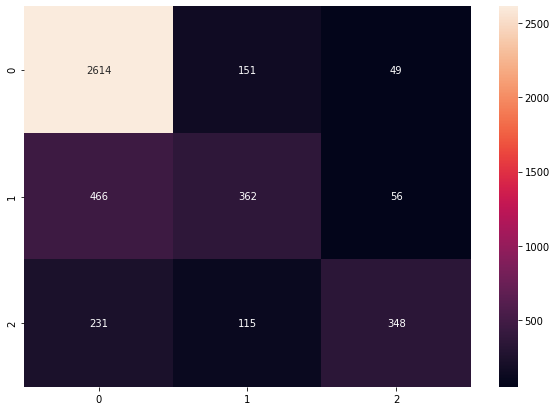

In [25]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 1000)

In [27]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7171448087431693


In [28]:
result = forest.predict(X_test)

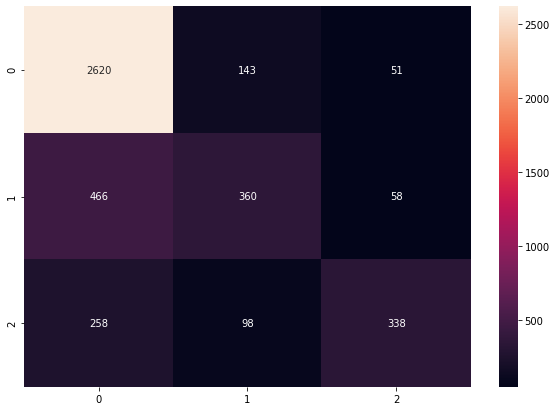

In [29]:

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset. (8 Marks)

Summary:

- The goal was to build a model for text-classification.
- Used dataset which has reviews in text format and their sentiment score " positive" , "neutral" and "negative

- Checked shape , printed first 5 rows
- Visualized the data with graphs -- to analyze data airline wise and sentiment wise before dropping coloumns

- Visualized and displayed graph Catogorizing Negative reasons 

- Dropped all columns expecpt " text" and "Airline_sentiment"

- Pre-processed the data using variuos techniques and libraries.

- Removed html, applied Tokenization, removed numbers, removed special characters and punctuations, converted to lower case.
- data was pre=processed using Lemmatizing / Stemming and Joined the words back
- The pre-precessed data is converted to numbers, so that we can feed the data in the model.

- Used Vectorization 
- Count Vectorizer and TfidfVectorizer was used.

- Random Forest Classification Model was built for both Count Vectorizer and TfidfVectorizer
- Both were models were fit and evaluated  
- Confusion matrix for both Count Vectorizer and TfidfVectorizer
- After building the classification model, we predicted the result for the test data.


- After that we saw that using the above techniques, our model performed good in perspective of how the text classification models perform.

Overall sentiment show is negative for almost all airlines in the twitter posts. Both model performed equally well but TF-IDF did little better compared to Vectorizer.